## Лаб.02 K-means_датасет

### Кластеризация методом K-means

---

#### Входные данные: 
`us_census` датасет в формате csv, содержащий данные о городах США (индекс, штат, географические широта и долгота, численность населения).

#### Задание:
Написать программный код разбиения городов самого большого штата на кластеры таким образом, чтобы определить местонахождение центров, оптимальное по удаленности городов. 

**Порядок выполнения работы:**
1.	Загрузите данные в датафрейм. Определите штат с максимальным количеством городов.
2.	Выделите из датафрейма столбцы с географическими координатами для городов выбранного штата.
3.	Постройте модели кластеризации методом K-means, задав для каждой число кластеров из интервала [1, 8]. Вычислите метрики: силуэт и сумму квадратов расстояний от центроидов (inertia).
4.	Постройте диаграммы с исходными точками и центроидами полученных кластеров. Оцените визуально нахождение центров относительно распределения городов: совпадают ли центроиды с наиболее населенными районами.
5.	Вычислите для каждой модели число точек в каждом кластере. Совет: воспользуйтесь методом `numpy.unique()`
6.	Найдите города, наиболее приближенные к центроидам кластеров.

---

1.	Загрузите данные в датафрейм. Определите штат с максимальным количеством городов.

* Load data into a dataframe. Determine the state with the maximum number of cities.

In [ ]:
# подключим библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# добавим данные в датаафрейм

# use this line if on Jupyter
# df = pd.read_csv('us_census.csv')

# use this line if on Colab
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/us_census.csv')

In [ ]:
# выведем первые 5 строк таблицы

df.head(5)

,zip,state,latitude,longitude,population
0,601,PR,18.180103,-66.74947,19143
1,602,PR,18.363285,-67.18024,42042
2,603,PR,18.448619,-67.13422,55592
3,604,PR,18.498987,-67.13699,3844
4,606,PR,18.182151,-66.95880,6449


In [ ]:
# информация о наборе данных

print(df.columns)
print(df.shape)
print(df.dtypes)

Index(['zip', 'state', 'latitude', 'longitude', 'population'], dtype='object')
(31951, 5)
zip             int64
state          object
latitude      float64
longitude     float64
population      int64
dtype: object


In [ ]:
df.describe()

,zip,latitude,longitude,population
count,31951.000000,31951.000000,31951.000000,31951.000000
mean,49802.625333,38.851441,-91.044530,8925.830490
std,27330.096259,5.347607,15.028834,13114.560356
min,601.000000,17.964529,-176.636750,1.000000
25%,27316.500000,35.415903,-97.161550,776.000000
50%,49912.000000,39.480856,-88.304980,2762.000000
75%,71987.000000,42.113861,-80.395450,11867.000000
max,99950.000000,71.299525,-65.292570,144024.000000


In [ ]:
df.isnull().sum()

zip           0
state         0
latitude      0
longitude     0
population    0
dtype: int64

In [ ]:
# определим штат с максимальным числом городов

df.groupby('state').zip.nunique().sort_values(ascending=False)

state
TX    1861
PA    1721
CA    1667
NY    1594
IL    1345
OH    1159
MO    1009
MI     962
IA     948
FL     920
VA     884
MN     864
NC     783
WI     767
KY     766
IN     760
WV     733
GA     707
KS     689
OK     655
AL     623
TN     607
AR     594
NJ     582
NE     578
WA     559
LA     514
MA     500
CO     479
MD     452
MS     423
OR     406
SC     406
ME     399
ND     380
SD     378
AZ     364
MT     349
NM     344
ID     275
UT     273
CT     266
VT     254
AK     241
NH     227
WY     166
NV     146
PR     125
HI      87
RI      70
DE      65
DC      25
Name: zip, dtype: int64

Штат с максимальным числом городов — ТХ.

--- 

2.	Выделите из датафрейма столбцы с географическими координатами для городов выбранного штата.

* Select from the dataframe columns with geographic coordinates for the cities of the selected state.

In [ ]:
df1 = df[df['state'] == 'TX'][['latitude', 'longitude']].reset_index(drop=True)

In [ ]:
# широта и долгота городов Техаса с их населением

df1

,latitude,longitude
0,32.961290,-96.83751
1,33.092846,-96.62447
2,32.960374,-96.89163
3,33.005420,-96.89773
4,33.327927,-96.76129
...,...,...
1856,31.865696,-106.59982
1857,31.943633,-106.42402
1858,31.784541,-106.33705
1859,31.766355,-106.29828


---

3.	Постройте модели кластеризации методом K-means, задав для каждой число кластеров из интервала [1, 8]. Вычислите метрики: силуэт и сумму квадратов расстояний от центроидов (inertia).

* Build clustering models using the K-means method, specifying for each the number of clusters from the interval [1, 8]. Calculate metrics: silhouette and sum of squared distances from centroids (inertia).

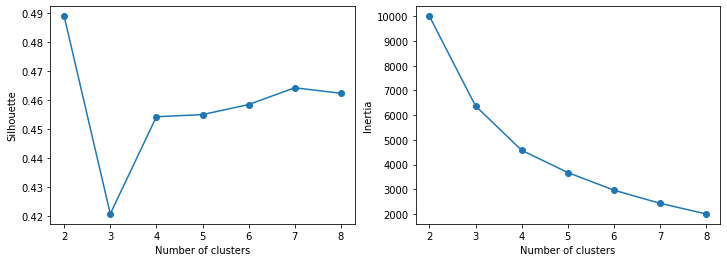

In [ ]:
# hint: we use the longlat to predict the population

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette = []
inertia = []
for k in range(2, 9):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df1)
    silhouette.append(silhouette_score(df1, model.labels_))
    inertia.append(model.inertia_)

# plot the silhouette and inertia metrics for each number of clusters

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 9), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.subplot(1, 2, 2)
plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
silhouette

[0.4888063673193918,
 0.42060645270612057,
 0.45413130888226166,
 0.4548766745399144,
 0.4583453270304193,
 0.4641273276925331,
 0.4622293352995509]

In [ ]:
inertia

[9998.264023894404,
 6373.698178056624,
 4581.121232085635,
 3682.4960366079995,
 2969.4936399177786,
 2438.4042948995784,
 2008.6466986351131]

---

4.	Постройте диаграммы с исходными точками и центроидами полученных кластеров. Оцените визуально нахождение центров относительно распределения городов: совпадают ли центроиды с наиболее населенными районами.

* Construct diagrams with initial points and centroids of the received clusters. Assess visually the location of the centers in relation to the distribution of cities: whether the centroids coincide with the most populated areas.

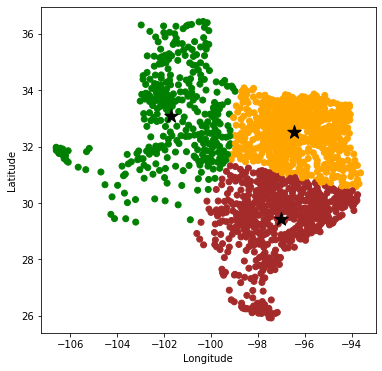

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df1)
centroids = model.cluster_centers_
df1['cluster'] = model.labels_
df1['centroid'] = df1['cluster'].map({0: 'brown', 1: 'orange', 2: 'green'})
plt.figure(figsize=(6, 6))
plt.scatter(df1['longitude'], df1['latitude'], c=df1['centroid'])
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=200)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

---

5.	Вычислите для каждой модели число точек в каждом кластере. Совет: воспользуйтесь методом `numpy.unique()`

* Calculate for each model the number of points in each cluster. Tip: use the `numpy.unique()` method

In [ ]:
# количество городов в каждом кластере

for k in range(1, 9):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df1[['latitude', 'longitude']])
    print(np.unique(model.labels_, return_counts=True))

(array([0], dtype=int32), array([1861]))
(array([0, 1], dtype=int32), array([1462,  399]))
(array([0, 1, 2], dtype=int32), array([805, 685, 371]))
(array([0, 1, 2, 3], dtype=int32), array([454, 433, 350, 624]))
(array([0, 1, 2, 3, 4], dtype=int32), array([429, 291, 612, 454,  75]))
(array([0, 1, 2, 3, 4, 5], dtype=int32), array([557, 166, 249, 424,  82, 383]))
(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([138, 177, 528, 337, 189,  82, 410]))
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([130, 428, 165, 380,  60, 169, 335, 194]))


---

6.	Найдите города, наиболее приближенные к центроидам кластеров.

* Find the cities closest to the cluster centroids.

In [ ]:
def plot_closest(df, closest):
    plt.figure(figsize=(6, 6))
    plt.scatter(df['longitude'], df['latitude'], c=df1['centroid'])
    plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=500)
    for i in range(len(closest)):
        plt.scatter(df.loc[closest[i], 'longitude'], df.loc[closest[i], 'latitude'], c='yellow')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

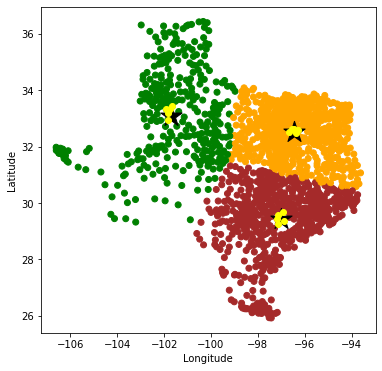

In [ ]:
closest = []
for centroid in centroids:
    dist = np.sqrt((df1['longitude'] - centroid[1]) ** 2 + (df1['latitude'] - centroid[0]) ** 2)
    closest.append(dist.nsmallest(5).index)
plot_closest(df1, closest)

In [ ]:
for i in range(len(closest)):
  print(f'Cluster {i}')
  print(f'Longitude: ', df1.loc[closest[i], 'longitude'].values, f'\nLatitude: ', df1.loc[closest[i], 'latitude'].values)
  print()

Cluster 0
Longitude:  [-96.86644 -97.18691 -97.12675 -97.13046 -96.91964] 
Latitude:  [29.369619 29.442934 29.57449  29.254632 29.680723]

Cluster 1
Longitude:  [-96.44339 -96.38502 -96.53811 -96.30377 -96.65684] 
Latitude:  [32.629178 32.466891 32.628858 32.574299 32.533551]

Cluster 2
Longitude:  [-101.81949 -101.83895 -101.76906 -101.91065 -101.65054] 
Latitude:  [33.199867 32.951473 33.327782 33.330983 33.437291]

